# VGG16 model from Keras and transfer learning

In [2]:
!apt-get update && apt-get install -y python3-opencv
!pip install opencv-python
!pip install matplotlib
!pip install wandb


Selecting previously unselected package libatk1.0-data.
Preparing to unpack .../102-libatk1.0-data_2.35.1-1ubuntu2_all.deb ...
Unpacking libatk1.0-data (2.35.1-1ubuntu2) ...
Selecting previously unselected package libatk1.0-0:amd64.
Preparing to unpack .../103-libatk1.0-0_2.35.1-1ubuntu2_amd64.deb ...
Unpacking libatk1.0-0:amd64 (2.35.1-1ubuntu2) ...
Selecting previously unselected package libatk-bridge2.0-0:amd64.
Preparing to unpack .../104-libatk-bridge2.0-0_2.34.2-0ubuntu2~20.04.1_amd64.deb ...
Unpacking libatk-bridge2.0-0:amd64 (2.34.2-0ubuntu2~20.04.1) ...
Selecting previously unselected package libavahi-common-data:amd64.
Preparing to unpack .../105-libavahi-common-data_0.7-4ubuntu7.1_amd64.deb ...
Unpacking libavahi-common-data:amd64 (0.7-4ubuntu7.1) ...
Selecting previously unselected package libavahi-common3:amd64.
Preparing to unpack .../106-libavahi-common3_0.7-4ubuntu7.1_amd64.deb ...
Unpacking libavahi-common3:amd64 (0.7-4ubuntu7.1) ...
Selecting previously unselected pac

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

import wandb
from wandb.keras import WandbCallback

wandb.init(project='vgg16-transfer-learning', entity='picklerick')

#---------------HYPERPARAMETERS--------------------
WEIGHTS = 'imagenet'
INLCUDE_TOP = True
OPTIMIZER = 'sgd'
LOSS_FUNCTION = 'categorical_crossentropy'

wandb.config = {
  'include_top': INLCUDE_TOP, 
  'weights': WEIGHTS,
  'optimizer': OPTIMIZER,
  'loss_function': LOSS_FUNCTION,
}

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Load base model 

In [3]:
base_model = tf.keras.applications.VGG16(weights=WEIGHTS, include_top=INLCUDE_TOP)
print(base_model)
for index, layer in enumrate(base_model.layers)
    print(index, layer.name, layer.output_shape)

SyntaxError: invalid syntax (3046962697.py, line 3)

## Load image and resize to input of VGG16

In [6]:
image = cv2.resize(cv2.imread('locomotive.jpg'), (224,224))
im = np.expand_dims(image,axis=0)

## Predict class of input image

1/1 [==============================] - 1s 779ms/step
Output of the network:  [[6.94755087e-10 1.44956561e-10 1.21790772e-10 1.26972280e-10
  5.10637227e-11 1.17996446e-09 7.61237670e-11 4.81122830e-09
  1.13651142e-08 5.01906650e-09 4.86863494e-10 2.66097727e-10
  1.62384906e-09 4.50715937e-10 1.62309655e-09 1.95213068e-09
  5.33686872e-10 2.87422947e-10 8.58559979e-09 2.85113877e-10
  5.70713310e-10 6.41363407e-09 5.36907363e-09 2.57986926e-07
  2.34012958e-07 6.04651940e-10 7.40878747e-10 2.55715338e-10
  7.66484543e-10 5.03951290e-11 2.13238538e-09 3.63977026e-09
  8.14803958e-09 1.85191959e-10 3.20282828e-10 6.40036246e-09
  4.12991863e-09 3.43600370e-09 1.21712807e-09 1.08319966e-08
  5.63372904e-10 2.17570281e-10 3.50170670e-10 7.91498922e-10
  2.39570874e-09 1.16490140e-09 8.53779658e-10 3.09060226e-08
  5.97671357e-10 7.19850568e-10 7.38069217e-10 1.78769639e-07
  1.31632483e-10 1.81228352e-10 1.30045885e-09 7.78759834e-10
  3.89082044e-10 1.94244315e-10 1.23758326e-09 2.190463

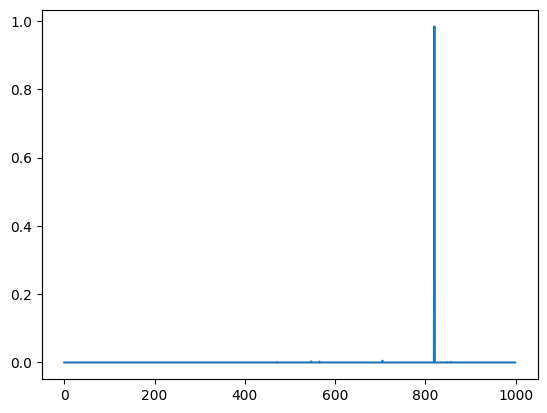

In [7]:
out = model.predict(im)
index = np.argmax(out)
print('Output of the network: ',out)
print('Top class prediction: ',index)

plt.plot(out.ravel())
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ba4822a4-198a-4cdb-8280-0ca8d044b999' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>